# Exercise Set 1: Exploring the Oregon Health Insurance Experiment Data

**Objective:** Practice your new skills in data visualization using the OHIE dataset. You will:
- Load and clean data
- Create histograms, KDE plots, and ECDFs
- Compare subgroups using bar plots, box plots, and swarm plots

**Dataset:** `OHIE_12m.csv`

## 1. Setup

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')


In [9]:
# Make Google Drive available to the script
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Intro to Python for Epidemiologists/Data/OHIE_12m.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,person_id,household_id,treatment,draw_treat,draw_lottery,applied_app,approved_app,dt_notify_lottery,dt_retro_coverage,birthyear_list,...,live_other_12m,hhsize_12m,PHQ2_1,PHQ2_2,PHQ2_sum,PHQ2_cutoff,health_gen_12m,happiness_12m,cost_tot_oop_12m,cost_tot_owe_12m
0,30699,130699,Not selected,NaN,Lottery Draw 3,NaN,NaN,2008-04-16,2008-05-08,1963,...,No,1.0,0.0,0.0,0.0,False,fair,pretty happy,NaN,NaN
1,27008,157418,Selected,Draw 1: selected in lottery 03/05/2008,Lottery Draw 1,Submitted an Application to OHP,No,2008-03-10,2008-03-11,1976,...,No,2.0,0.0,0.0,0.0,False,good,pretty happy,0.0,3000.0
2,8005,108005,Selected,Draw 4: selected in lottery 05/01/2008,Lottery Draw 4,Did NOT submit an application to OHP,No,2008-05-09,2008-06-09,1986,...,No,2.0,2.0,0.0,2.0,False,fair,not too happy,318.0,NaN
3,73743,173743,Selected,Draw 7: selected in lottery 08/01/2008,Lottery Draw 7,Submitted an Application to OHP,No,2008-08-12,2008-09-08,1986,...,No,3.0,0.0,0.0,0.0,False,excellent,very,340.0,398.0
4,61685,161685,Not selected,NaN,Lottery Draw 7,NaN,NaN,2008-08-12,2008-09-08,1959,...,No,1.0,0.0,0.0,0.0,False,fair,very,0.0,NaN


## 2. Explore the Data
Take a look at the structure of the dataset. How many people are in the treatment vs control group?

In [10]:
df['treatment'].value_counts()

,count
treatment,
Selected,2007
Not selected,1993


## 3. Plotting a Distribution
Visualize the distribution of depression scores using a histogram and a KDE plot.

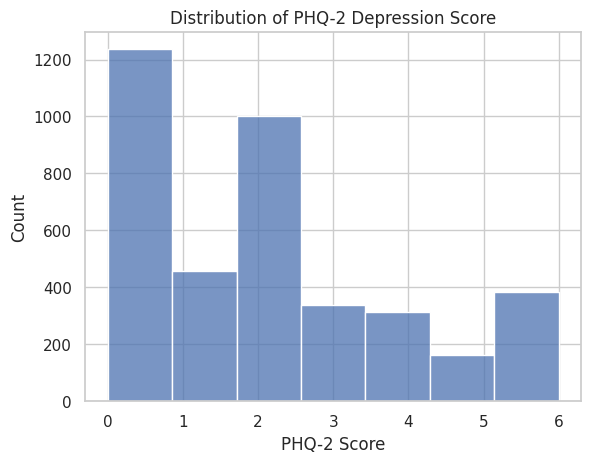

In [11]:
# Histogram of PHQ2_sum
sns.histplot(df['PHQ2_sum'].dropna(), bins=7)
plt.title('Distribution of PHQ-2 Depression Score')
plt.xlabel('PHQ-2 Score')
plt.show()

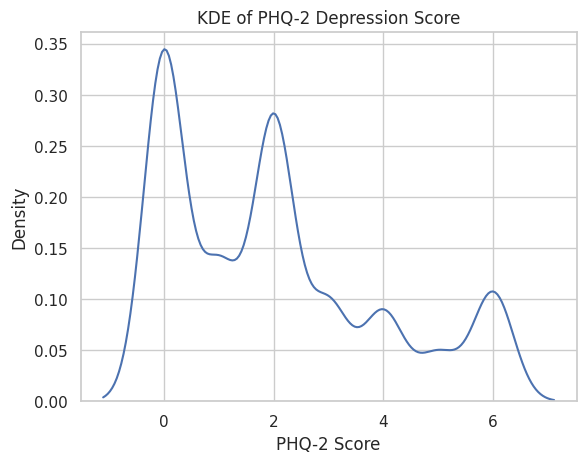

In [12]:
# KDE plot
sns.kdeplot(data=df, x='PHQ2_sum')
plt.title('KDE of PHQ-2 Depression Score')
plt.xlabel('PHQ-2 Score')
plt.show()

#### Why is the KDE plot not a great choice for the PHQ2 distribution?

In [13]:
# Answer: because the X axis is not continuous but ordinal and does not have enough levels.
# KDE works best for a smooth, continuous distribution with many levels.

## 4. Apply a Log Transformation
Try showing the distribution of `hhinc_pctfpl_12m` (household income as percentage of federal poverty line) with and without log-transforming the x axis using `plt.xscale('log')`. Which version do you prefer, and why?

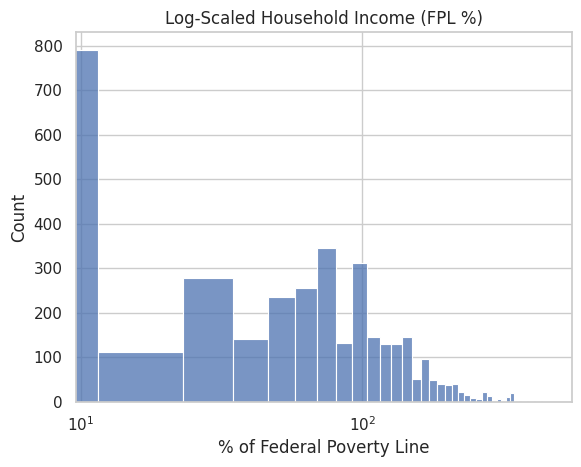

In [14]:
sns.histplot(df['hhinc_pctfpl_12m'].dropna())
plt.xscale('log')
plt.title('Log-Scaled Household Income (FPL %)')
plt.xlabel('% of Federal Poverty Line')
plt.show()

## 5. Compare Groups Using Bar and Box Plots
Compare total out-of-pocket health expenses in past 6 months (`cost_tot_oop_12m`) across treatment and control groups.
- Create a barplot first without and then with a stripplot overlay. What do you notice about the difference?
- Create a boxplot, using a log scale on the y axis. Boxplots show the median, which can be a useful central tendency measure for skewed distributions. Try also computing the median for `cost_tot_oop_12m` using `.groupby()` and `.describe()`, which you learned about in the previous module. Are the medians different between the two treatment groups?

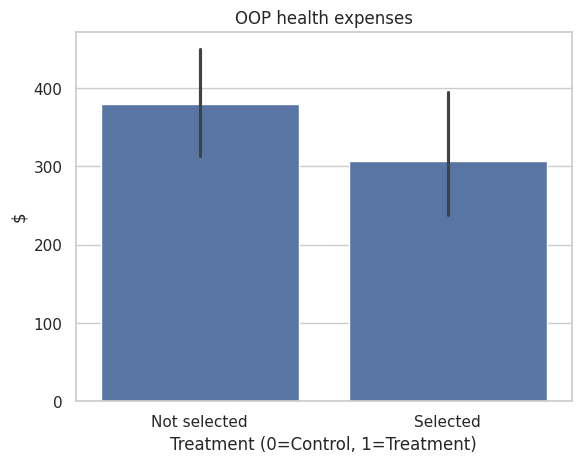

In [15]:
sns.barplot(data=df, x='treatment', y='cost_tot_oop_12m', errorbar=('ci',95))
plt.title('OOP health expenses')
plt.xlabel('Treatment (0=Control, 1=Treatment)')
plt.ylabel('$')
plt.show()

Looks great, right? But watch out:

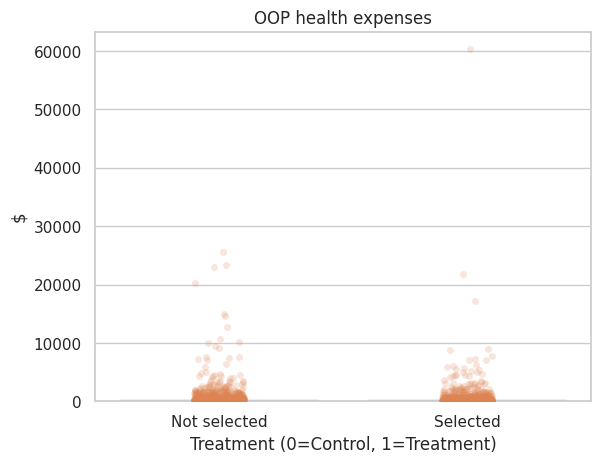

In [16]:
sns.barplot(data=df, x='treatment', y='cost_tot_oop_12m', errorbar=('ci',95), alpha = .5)
sns.stripplot(data=df, x='treatment', y='cost_tot_oop_12m', alpha = .2)
plt.title('OOP health expenses')
plt.xlabel('Treatment (0=Control, 1=Treatment)')
plt.ylabel('$')
plt.show()

There are massive outliers in this data, which stretch the y axis once you include individual data points. Boxplots handle outliers better (though not perfectly) -- it works OK when combined with a log transformation on the Y axis:

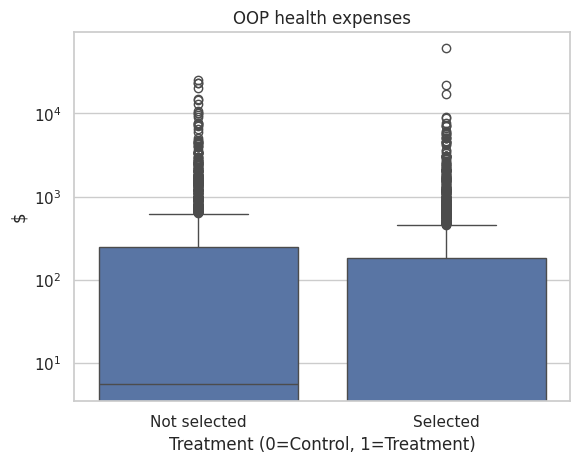

In [17]:
sns.boxplot(data=df, x='treatment', y='cost_tot_oop_12m')
plt.title('OOP health expenses')
plt.xlabel('Treatment (0=Control, 1=Treatment)')
plt.ylabel('$')
plt.yscale('log')
plt.show()

A boxplot shows the median, which appears to be different for Not selected vs Selected. Let's confirm using our skills from the previous module:

In [18]:
df.groupby('treatment')['cost_tot_oop_12m'].describe()

,count,mean,std,min,25%,50%,75%,max
treatment,,,,,,,,
Not selected,1904.0,379.560593,1466.817491,0.0,0.0,5.5,250.0,25500.0
Selected,1917.0,306.454215,1688.448708,0.0,0.0,0.0,180.0,60300.0


The 50% percentile is the same as the median. This is higher for Not selected than for Selected, which makes sense: acquiring health insurance seems to lower the amount of money spent on health care out-of-pocket.

## 6. Swarm or Point Plot for Small Sample Exploration
Create a swarm plot comparing `PHQ2_sum` by `female_list`.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


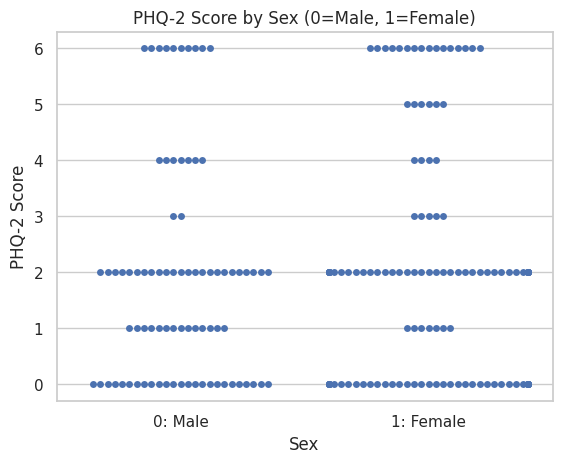

In [19]:
# Downsample for clarity
small_df = df.dropna(subset=['PHQ2_sum', 'female_list']).sample(200, random_state=1)
sns.swarmplot(data=small_df, x='female_list', y='PHQ2_sum')
plt.title('PHQ-2 Score by Sex (0=Male, 1=Female)')
plt.xlabel('Sex')
plt.ylabel('PHQ-2 Score')
plt.show()

# 7. Categorical outcome: happiness

Create a Seaborn `countplot` that shows counts for levels of `happiness_12m`. Split the bars by `treatment` using the `hue` parameter. Use the `order` parameter to set an intuitive order of the levels of happiness.

Text(0, 0.5, 'Count')

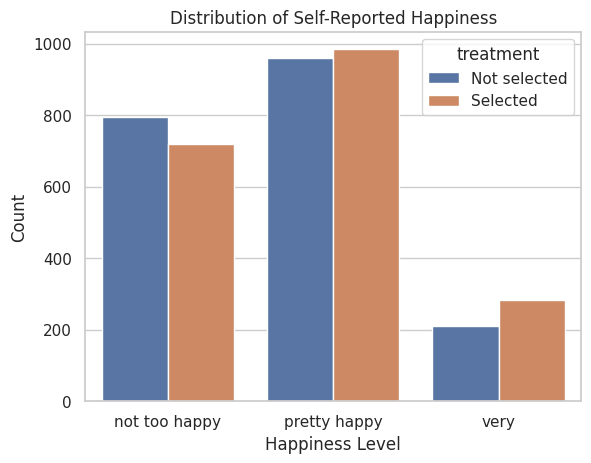

In [20]:
sns.countplot(data=df, x="happiness_12m", hue = 'treatment', order=["not too happy","pretty happy", "very"])
plt.title("Distribution of Self-Reported Happiness")
plt.xlabel("Happiness Level")
plt.ylabel("Count")

Try exchanging the `x` and `hue` parameters in the `countplot`. Which version do you prefer? Hint: you may have to change the `order` parameter to `hue_order`.

Text(0, 0.5, 'Count')

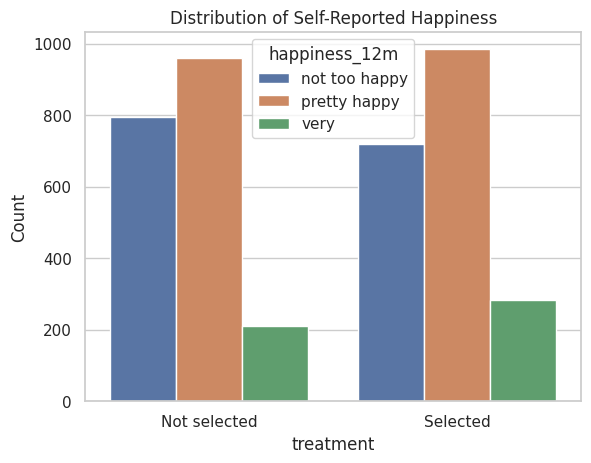

In [21]:
sns.countplot(data=df, hue="happiness_12m", x = 'treatment', hue_order=["not too happy","pretty happy", "very"])
plt.title("Distribution of Self-Reported Happiness")
plt.ylabel("Count")

Save your plot to a .pdf file

Text(0, 0.5, 'Count')

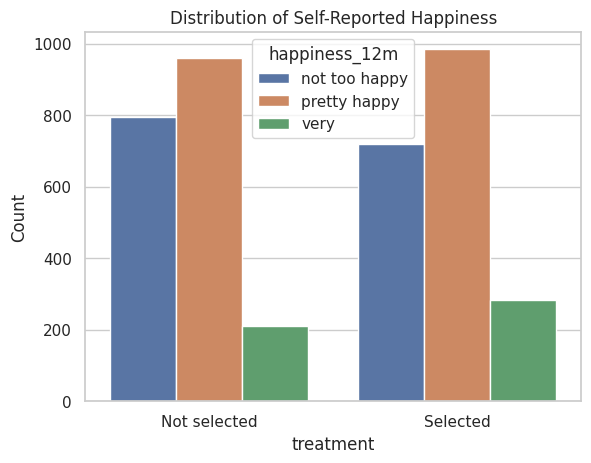

In [22]:
fig,ax = plt.subplots()
sns.countplot(data=df, hue="happiness_12m", x = 'treatment', hue_order=["not too happy","pretty happy", "very"], ax = ax)
plt.title("Distribution of Self-Reported Happiness")
plt.ylabel("Count")

In [23]:
fig.savefig('happiness.pdf')